In [7]:
import pandas as pd
import os

In [12]:
import pandas as pd
import os

# Directory where your files are located
directory = 'Sales_Data\\Sales_Data_2021'

# List all files in the directory
files = [file for file in os.listdir(directory)]

# Initialize an empty DataFrame to store all data
all_months_data = pd.DataFrame()

# Loop through files and concatenate data
for file in files:
    # Get the full file path by joining the directory and file name
    file_path = os.path.join(directory, file)
    
    # Read the CSV file and concatenate data
    df = pd.read_csv(file_path)
    all_months_data = pd.concat([all_months_data, df])

# Save the concatenated data to a new CSV file
all_months_data.to_csv("all_data3.csv", index=False)


In [13]:
all_data2021 = pd.read_csv("all_data3.csv")
all_data2021.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,182448,Google Phone,1,600.0,04/23/21 10:37,"248 West St, Boston, MA 02215"
1,182449,Bose SoundSport Headphones,1,99.99,04/20/21 16:56,"984 Dogwood St, San Francisco, CA 94016"
2,182450,AA Batteries (4-pack),2,3.84,04/17/21 16:59,"773 1st St, New York City, NY 10001"
3,182451,Bose SoundSport Headphones,1,99.99,04/07/21 23:30,"814 Dogwood St, Los Angeles, CA 90001"
4,182452,Google Phone,1,600.0,04/02/21 19:55,"998 4th St, Boston, MA 02215"


# Augument Data with additional columns

### Clean up the data: clearing rows with NaN in the various columns
 since it will not allows us to manipulate those values

### Drop rows with NaN

In [14]:
nan_df = all_data2021[all_data2021.isna().any(axis=1)]
nan_df.head()
all_data2021 = all_data2021.dropna(how = 'all')
all_data2021.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,182448,Google Phone,1,600.0,04/23/21 10:37,"248 West St, Boston, MA 02215"
1,182449,Bose SoundSport Headphones,1,99.99,04/20/21 16:56,"984 Dogwood St, San Francisco, CA 94016"
2,182450,AA Batteries (4-pack),2,3.84,04/17/21 16:59,"773 1st St, New York City, NY 10001"
3,182451,Bose SoundSport Headphones,1,99.99,04/07/21 23:30,"814 Dogwood St, Los Angeles, CA 90001"
4,182452,Google Phone,1,600.0,04/02/21 19:55,"998 4th St, Boston, MA 02215"


### Find 'Or' and Delete

In [15]:
all_data2021 = all_data2021[all_data2021['Order Date'].str[0:2] != 'Or']
all_data2021.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,182448,Google Phone,1,600.0,04/23/21 10:37,"248 West St, Boston, MA 02215"
1,182449,Bose SoundSport Headphones,1,99.99,04/20/21 16:56,"984 Dogwood St, San Francisco, CA 94016"
2,182450,AA Batteries (4-pack),2,3.84,04/17/21 16:59,"773 1st St, New York City, NY 10001"
3,182451,Bose SoundSport Headphones,1,99.99,04/07/21 23:30,"814 Dogwood St, Los Angeles, CA 90001"
4,182452,Google Phone,1,600.0,04/02/21 19:55,"998 4th St, Boston, MA 02215"


### Convert Columns to the correct Data type

In [16]:
try:
    all_data2021['Quantity Ordered'] = pd.to_numeric(all_data2021['Quantity Ordered'])
    all_data2021['Price Each'] = pd.to_numeric(all_data2021['Price Each'])
except ValueError as e:
    print(f"Error converting columns: {e}")

### Handle missing values

In [17]:
all_data2021['Quantity Ordered'].fillna(0, inplace=True)
all_data2021['Price Each'].fillna(0, inplace=True)

### Task 1: Add Month Column

In [18]:
all_data2021['Month'] = all_data2021['Order Date'].str[0:2]
all_data2021['Month'] = all_data2021['Month'].astype('int32')
all_data2021.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,182448,Google Phone,1,600.00,04/23/21 10:37,"248 West St, Boston, MA 02215",4
1,182449,Bose SoundSport Headphones,1,99.99,04/20/21 16:56,"984 Dogwood St, San Francisco, CA 94016",4
2,182450,AA Batteries (4-pack),2,3.84,04/17/21 16:59,"773 1st St, New York City, NY 10001",4
3,182451,Bose SoundSport Headphones,1,99.99,04/07/21 23:30,"814 Dogwood St, Los Angeles, CA 90001",4
4,182452,Google Phone,1,600.00,04/02/21 19:55,"998 4th St, Boston, MA 02215",4


### Task 2: Add a sales column

In [19]:
all_data2021['Sales'] = all_data2021['Quantity Ordered'] * all_data2021['Price Each']
all_data2021.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,182448,Google Phone,1,600.00,04/23/21 10:37,"248 West St, Boston, MA 02215",4,600.00
1,182449,Bose SoundSport Headphones,1,99.99,04/20/21 16:56,"984 Dogwood St, San Francisco, CA 94016",4,99.99
2,182450,AA Batteries (4-pack),2,3.84,04/17/21 16:59,"773 1st St, New York City, NY 10001",4,7.68
3,182451,Bose SoundSport Headphones,1,99.99,04/07/21 23:30,"814 Dogwood St, Los Angeles, CA 90001",4,99.99
4,182452,Google Phone,1,600.00,04/02/21 19:55,"998 4th St, Boston, MA 02215",4,600.00


### Task 3: Add a City Column

In [20]:
# lets use .apply() method
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data2021['City'] = all_data2021['Purchase Address'].apply(lambda x: x.split(',')[1] + ' '+ get_state(x))
all_data2021.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,182448,Google Phone,1,600.00,04/23/21 10:37,"248 West St, Boston, MA 02215",4,600.00,Boston MA
1,182449,Bose SoundSport Headphones,1,99.99,04/20/21 16:56,"984 Dogwood St, San Francisco, CA 94016",4,99.99,San Francisco CA
2,182450,AA Batteries (4-pack),2,3.84,04/17/21 16:59,"773 1st St, New York City, NY 10001",4,7.68,New York City NY
3,182451,Bose SoundSport Headphones,1,99.99,04/07/21 23:30,"814 Dogwood St, Los Angeles, CA 90001",4,99.99,Los Angeles CA
4,182452,Google Phone,1,600.00,04/02/21 19:55,"998 4th St, Boston, MA 02215",4,600.00,Boston MA


### Question 1: What was the best month for sales? How much was earned that month?

In [21]:
results = all_data2021.groupby('Month').sum()

C:\Users\Code Kid⚡\AppData\Local\Temp\ipykernel_25964\4156490547.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data2021.groupby('Month').sum()


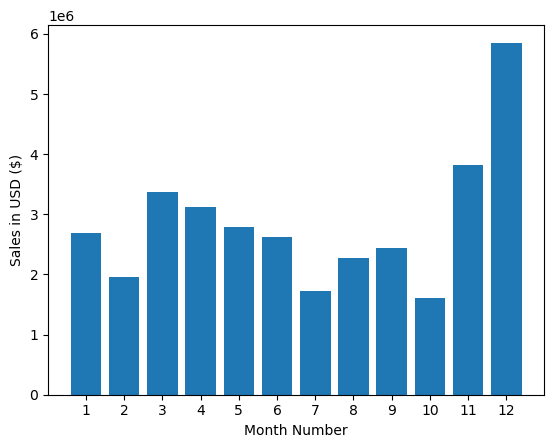

In [22]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

#From the Chart it is seen that Month 11 and 12 had the highest number of sales.

### Question 2: What City had the highest number of Sales?

In [23]:
results = all_data2021.groupby('City').sum()
results

# From the table it is seen that San Francisco CA had the highest number of sales.

C:\Users\Code Kid⚡\AppData\Local\Temp\ipykernel_25964\1325639209.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data2021.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16569,2704681.40,102544,2718945.51
Austin TX,11064,1826475.09,68531,1837745.01
Boston MA,22200,3643091.70,136970,3663758.19
Dallas TX,16516,2713749.38,102156,2730407.13
Los Angeles CA,32709,5503284.16,202320,5535058.00
New York City NY,27315,4509840.42,170611,4536137.34
Portland ME,2730,462037.22,17222,464831.49
Portland OR,10845,1759364.52,67535,1768799.81
San Francisco CA,49193,8195809.31,303970,8245483.35


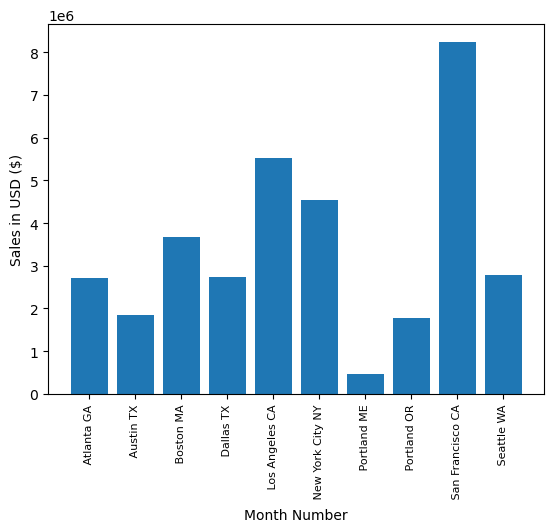

In [24]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data2021.groupby('City')]

plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

### Question 3: What time should we Display advertisements to maximize likelihood of customer's buying product?

In [25]:
all_data2021['Order Date'] = pd.to_datetime(all_data2021['Order Date'])

In [26]:
all_data2021['Hour'] = all_data2021['Order Date'].dt.hour
all_data2021['Minute'] = all_data2021['Order Date'].dt.minute
all_data2021.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,182448,Google Phone,1,600.00,2021-04-23 10:37:00,"248 West St, Boston, MA 02215",4,600.00,Boston MA,10,37
1,182449,Bose SoundSport Headphones,1,99.99,2021-04-20 16:56:00,"984 Dogwood St, San Francisco, CA 94016",4,99.99,San Francisco CA,16,56
2,182450,AA Batteries (4-pack),2,3.84,2021-04-17 16:59:00,"773 1st St, New York City, NY 10001",4,7.68,New York City NY,16,59
3,182451,Bose SoundSport Headphones,1,99.99,2021-04-07 23:30:00,"814 Dogwood St, Los Angeles, CA 90001",4,99.99,Los Angeles CA,23,30
4,182452,Google Phone,1,600.00,2021-04-02 19:55:00,"998 4th St, Boston, MA 02215",4,600.00,Boston MA,19,55


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,4075,4075,4075,4075,4075,4075,4075,4075,4075,4075
1,2265,2265,2265,2265,2265,2265,2265,2265,2265,2265
2,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287
3,775,775,775,775,775,775,775,775,775,775
4,796,796,796,796,796,796,796,796,796,796
5,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239
6,2313,2313,2313,2313,2313,2313,2313,2313,2313,2313
7,4042,4042,4042,4042,4042,4042,4042,4042,4042,4042
8,6054,6054,6054,6054,6054,6054,6054,6054,6054,6054


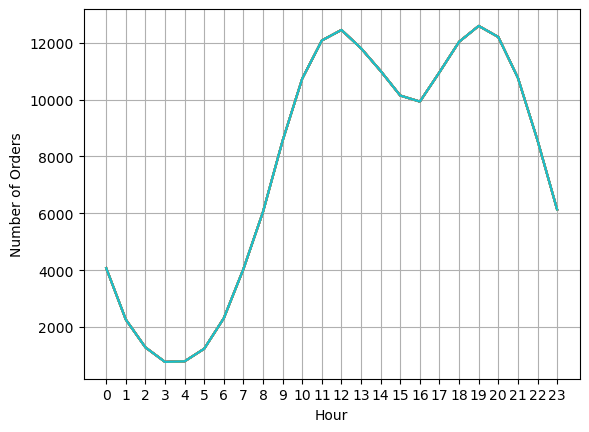

In [27]:
hours = [hour for hour, df in all_data2021.groupby('Hour')]

plt.plot(hours, all_data2021.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
all_data2021.groupby(['Hour']).count()


# From the chart my recommmendation is 11:00 (11am) and 19:00 (7pm)

### Question 4: What Products are sold more often?

In [28]:
df = all_data2021[all_data2021['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

C:\Users\Code Kid⚡\AppData\Local\Temp\ipykernel_25964\3502487106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
8,182456,"iPhone,Lightning Charging Cable"
53,182500,"Google Phone,USB-C Charging Cable"
129,182575,"Google Phone,USB-C Charging Cable"
153,182598,"Google Phone,Wired Headphones"
246,182690,"Google Phone,Wired Headphones"


In [29]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print (key,value)

('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Lightning Charging Cable') 966
('iPhone', 'Wired Headphones') 484
('Google Phone', 'Wired Headphones') 407
('Vareebadd Phone', 'USB-C Charging Cable') 354
('iPhone', 'Apple Airpods Headphones') 319
('Google Phone', 'Bose SoundSport Headphones') 235
('Vareebadd Phone', 'Wired Headphones') 152
('USB-C Charging Cable', 'Wired Headphones') 136
('Lightning Charging Cable', 'Wired Headphones') 102


### Question 4:  What products sold the most and why do you think it sold the most?

In [30]:
all_data2021.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,182448,Google Phone,1,600.00,2021-04-23 10:37:00,"248 West St, Boston, MA 02215",4,600.00,Boston MA,10,37
1,182449,Bose SoundSport Headphones,1,99.99,2021-04-20 16:56:00,"984 Dogwood St, San Francisco, CA 94016",4,99.99,San Francisco CA,16,56
2,182450,AA Batteries (4-pack),2,3.84,2021-04-17 16:59:00,"773 1st St, New York City, NY 10001",4,7.68,New York City NY,16,59
3,182451,Bose SoundSport Headphones,1,99.99,2021-04-07 23:30:00,"814 Dogwood St, Los Angeles, CA 90001",4,99.99,Los Angeles CA,23,30
4,182452,Google Phone,1,600.00,2021-04-02 19:55:00,"998 4th St, Boston, MA 02215",4,600.00,Boston MA,19,55


C:\Users\Code Kid⚡\AppData\Local\Temp\ipykernel_25964\1675496515.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


<function matplotlib.pyplot.show(close=None, block=None)>

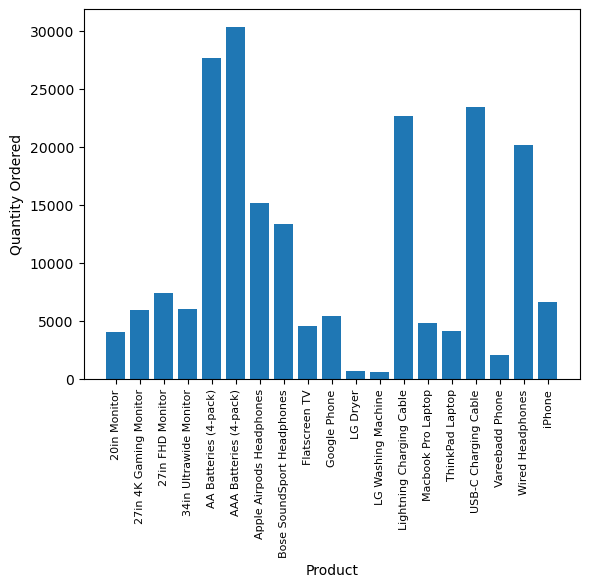

In [31]:
product_group = all_data2021.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.bar(products, quantity_ordered )
plt.xticks(products,rotation = 'vertical', size = 8)
plt.show

C:\Users\Code Kid⚡\AppData\Local\Temp\ipykernel_25964\3315715610.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data2021.groupby('Product').mean()['Price Each']
C:\Users\Code Kid⚡\AppData\Local\Temp\ipykernel_25964\3315715610.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


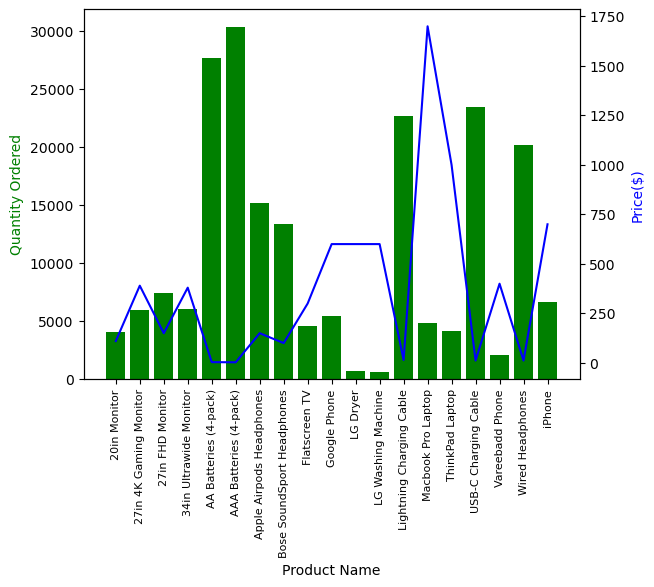

In [32]:
prices = all_data2021.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color= 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price($)', color='b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()

In [34]:
all_data2021.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,182448,Google Phone,1,600.00,2021-04-23 10:37:00,"248 West St, Boston, MA 02215",4,600.00,Boston MA,10,37
1,182449,Bose SoundSport Headphones,1,99.99,2021-04-20 16:56:00,"984 Dogwood St, San Francisco, CA 94016",4,99.99,San Francisco CA,16,56
2,182450,AA Batteries (4-pack),2,3.84,2021-04-17 16:59:00,"773 1st St, New York City, NY 10001",4,7.68,New York City NY,16,59
3,182451,Bose SoundSport Headphones,1,99.99,2021-04-07 23:30:00,"814 Dogwood St, Los Angeles, CA 90001",4,99.99,Los Angeles CA,23,30
4,182452,Google Phone,1,600.00,2021-04-02 19:55:00,"998 4th St, Boston, MA 02215",4,600.00,Boston MA,19,55


In [35]:
all_data2021.to_csv('all_data3.csv', index=False)